# Functional Form Assessment
In this tutorial I will outline an example functional form assessment. I will demonstrate the assessment with tools included in *zEpid*. Additionally, I will outline the functionality of the ``spline`` function. We will be using the sample data included with *zEpid*. We are interested in determing the functional form to use for baseline CD4 cell count (``cd40``) on all-cause mortality (``dead``).

In [5]:
%matplotlib inline

from zepid import load_sample_data
import matplotlib.pyplot as plt

df = load_sample_data(timevary=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 8 columns):
id      547 non-null int64
male    547 non-null int64
age0    547 non-null int64
cd40    547 non-null int64
dvl0    547 non-null int64
art     547 non-null int64
dead    517 non-null float64
t       547 non-null float64
dtypes: float64(2), int64(6)
memory usage: 38.5 KB


Throughout this tutorial, we will ignore the missing data in ``dead``. For details on accounting for missing data, see the inverse probability of missing tutorial.

## Linear 
First, let's look at a linear functional form. We can easily generate regression model results and a plot using ``functional_form_plot``. Let's look at our example

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')


A total of 99 categories were created. If you would like to 
                            influence  the number of categories the spline is fit to, do the following
	Increase: 
                            multiply by constant >1
	Decrease: multiply by contast <1 and >0
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   dead   No. Observations:                  517
Model:                            GLM   Df Residuals:                      515
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -218.92
Date:                Fri, 25 Jan 2019   Deviance:                       437.84
Time:                        19:39:55   Pearson chi2:                     530.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coe

c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


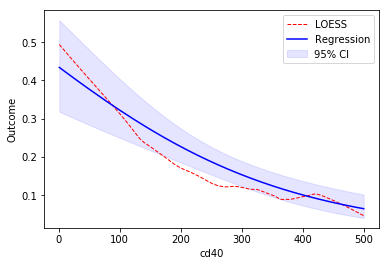

In [7]:
from zepid.graphics import functional_form_plot

functional_form_plot(df, outcome='dead', var='cd40', discrete=False)
plt.show()

``functional_form_plot`` by default generates a plot with a LOESS (or LOWESS) curve along with the estimated curve and corresponding confidence intervals. 

### Optional Parameters for Plots
Before going further, I am going to demonstrate a few different plot options; 1) controlling the smoothness of the LOESS curve, 2) adding points which are sized to reflect the $n$ for each category.

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


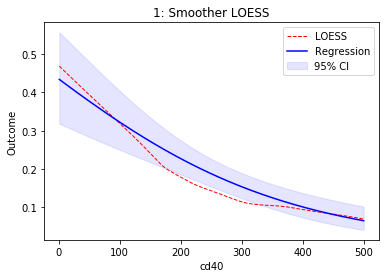

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


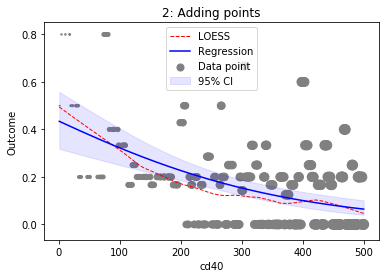

In [11]:
# 1) Smoothing LOESS curve further
functional_form_plot(df, outcome='dead', var='cd40', discrete=False, model_results=False, loess_value=0.6)
plt.title('1: Smoother LOESS')
plt.show()

# 2) Adding points
functional_form_plot(df, outcome='dead', var='cd40', discrete=False, model_results=False, points=True)
plt.title('2: Adding points')
plt.show()


There are other options. See online documentation or use ``help(functional_form_plot)`` for additional options

## Quadratic
Let's check if a quadratic functional form is better

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')


A total of 99 categories were created. If you would like to 
                            influence  the number of categories the spline is fit to, do the following
	Increase: 
                            multiply by constant >1
	Decrease: multiply by contast <1 and >0


c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   dead   No. Observations:                  517
Model:                            GLM   Df Residuals:                      514
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.30
Date:                Fri, 25 Jan 2019   Deviance:                       434.59
Time:                        19:58:25   Pearson chi2:                     519.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1500      0.340      0.442      0.659      -0.516       0.816
cd40          -0.0101      0.003     -3.309      0.0

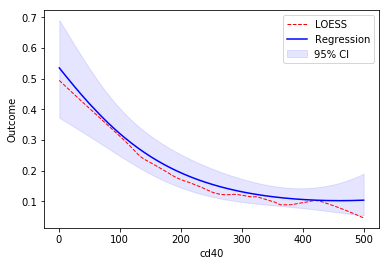

In [13]:
df['cd4_sq'] = df['cd40']**2  # Generating quadratic term

functional_form_plot(df, outcome='dead', var='cd40', f_form='cd40 + cd4_sq', discrete=False)
plt.show()

By the looks of it, a quadratic functional form matches the LOESS curve much better. This does not mean that quadratic is the true functional form we should use. Which leads us to the next section

## Splines
Splines are a more general functional form. We will look at several variations; a linear spline with 3 knots, a restricted quadratic spline with 3 knots, and a restricted quadratic spline with 5 knots. For the purpose of the tutorial, we will use the default knots locations. However, ``spline`` allows for custom knot placements. See the documentation for further details

### Unrestricted Linear Spline
To generate splines, we will use the ``spline`` function. We can calculate splines for CD4 with

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


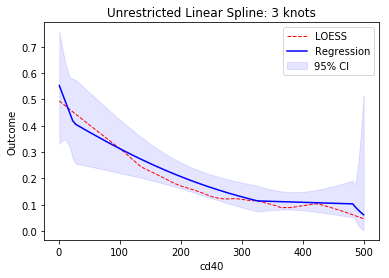

In [15]:
from zepid import spline

# Unrestricted Linear Spline: produces 3 terms
df[['cd4_l1', 'cd4_l2', 'cd4_l3']] = spline(df, var='cd40', term=1, n_knots=3, restricted=False)

# Functional Form Plot
functional_form_plot(df, outcome='dead', var='cd40', 
                     f_form='cd40 + cd4_l1 + cd4_l2 + cd4_l3', 
                     discrete=False, model_results=False)
plt.title('Unrestricted Linear Spline: 3 knots')
plt.show()

A linear spline doesn't look too great to our data. I'm sure we can do better

### Restricted Quadratic Spline
Now we will use a restricted spline. Restricted splines prevent the high variances at the ends of the splines (much like in the above plot). Restricted splines produce one less column than the number of specified knots (e.g. with 3 knots, there will be 2 terms generated). Additionally, we will allow the functional form to take a quadratic shape between each set of knots

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


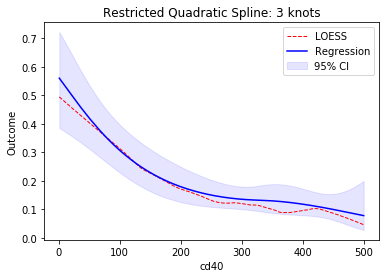

In [18]:
# Restricted Quadratic Spline: produces 2 terms
df[['cd4_q1', 'cd4_q2']] = spline(df, var='cd40', term=2, n_knots=3, restricted=True)

# Functional Form Plot
functional_form_plot(df, outcome='dead', var='cd40', 
                     f_form='cd40 + cd4_q1 + cd4_q2', 
                     discrete=False, model_results=False)
plt.title('Restricted Quadratic Spline: 3 knots')
plt.show()

The restricted quadratic spline looks great, but let's see if we can do better. Let's make a restricted quadratic spline with 5 knots

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


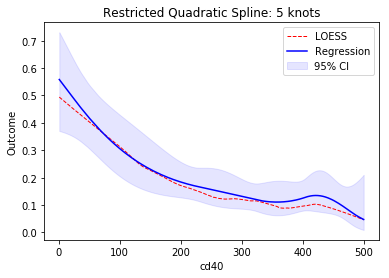

In [20]:
# Restricted Quadratic Spline: produces 4 terms
df[['cd4_rq1', 'cd4_rq2', 'cd4_rq3', 'cd4_rq4']] = spline(df, var='cd40', term=2, n_knots=5, restricted=True)

# Functional Form Plot
functional_form_plot(df, outcome='dead', var='cd40', 
                     f_form='cd40 + cd4_rq1 + cd4_rq2 + cd4_rq3 + cd4_rq4', 
                     discrete=False, model_results=False)
plt.title('Restricted Quadratic Spline: 5 knots')
plt.show()

Well, it looks like our restricted quadratic spline with 5 terms might be overfitting. As a next item to help us decide, we might compare AIC or BIC values between the two options. You can have these values printed to the console by removing the ``model_results=False`` option. Try this on your own

## Discrete Variable Functional Form
Before ending the tutorial, let's take a look at the functional form for age. Age is a discrete variable in our data set. I want to discuss this because *zEpid* handles these variables differently on the back-end. 

For continuous variables, categories are automatically generated. These generated categories are what determines the LOESS curve points. The user can control the number of categories by multiplying the column by some constant. To increase the number of categories, the column should be multiplies by a number greater than 1. To reduce the number of categories, the column can be multiplied by a constant between 0 and 1.

Discrete categories use each distinct value as a categories. Using the age categories as an example, each point to estimate the LOESS curve is from each distinct age observed in the data. Let's look at the data

c:\users\zivic\python programs\development\zepid\zepid\graphics\graphics.py:332: UserWarning: Warning: missing observations of model variables are dropped. 30 observations were dropped from the functional form assessment
  ' observations were dropped from the functional form assessment')
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\statsmodels\genmod\families\links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


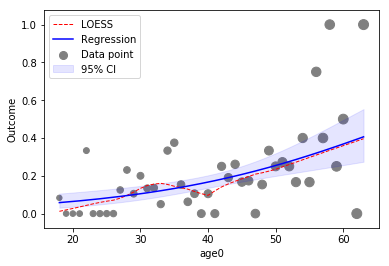

In [21]:
functional_form_plot(df, outcome='dead', var='age0', discrete=True, model_results=False, points=True)
plt.show()

Nothing looks too different in the plot. However, each point in the above data is each distinct age value observed in the data. Similarly, the size of points reflects the number of individuals in each age category

## Conclusion
In this tutorial I demonstrated functional form assessments and generating splines for functional forms. This concludes the tutorial on functional form assessment. Please view other tutorials for more information on functions in *zEpid*